In [1]:
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy.visualization import simple_norm
import regions
from regions import Regions
from astropy.table import Table
from astropy.nddata import Cutout2D
from scipy.ndimage import gaussian_filter


In [2]:
cd ..

/blue/adamginsburg/savannahgramze/cloudc/lactea-filament/lactea-filament


In [3]:
import cutout_manager as cm

In [4]:
cd notebooks/

/blue/adamginsburg/savannahgramze/cloudc/lactea-filament/lactea-filament/notebooks


In [5]:
ls /orange/adamginsburg/jwst/cloudc/images/*minus*

/orange/adamginsburg/jwst/cloudc/images/F405_minus_F410cont_merged-reproject_theoretical_bandwidth.fits
/orange/adamginsburg/jwst/cloudc/images/F410_minus_F405_merged-reproject_theoretical_bandwidth.fits


In [6]:
fn_cont = '/orange/adamginsburg/jwst/cloudc/images/F410_minus_F405_merged-reproject_theoretical_bandwidth.fits'
fn_line = '/orange/adamginsburg/jwst/cloudc/images/F405_minus_F410cont_merged-reproject_theoretical_bandwidth.fits'

In [100]:
#pos = SkyCoord('17:46:19.6150499663 -28:38:13.1951866060', unit=(u.hourangle, u.deg), frame='icrs')
#pos = SkyCoord('17:46:21.8586845938 -28:35:25.8528435574', unit=(u.hourangle, u.deg), frame='icrs')
#pos = SkyCoord('17:46:21.4298971269 -28:35:37.4888388463', unit=(u.hourangle, u.deg), frame='icrs')
#pos = SkyCoord('17:46:21.7648715433 -28:35:21.2734227988', unit=(u.hourangle, u.deg), frame='icrs')
pos = SkyCoord('17:46:21.3738557172 -28:35:31.9499729370', unit=(u.hourangle, u.deg), frame='icrs')
w = 48*u.arcsec
l = 25*u.arcsec

In [101]:
cutout_cont = cm.get_cutout(fn_cont, pos, l, w)
cutout_line = cm.get_cutout(fn_line, pos, l, w)

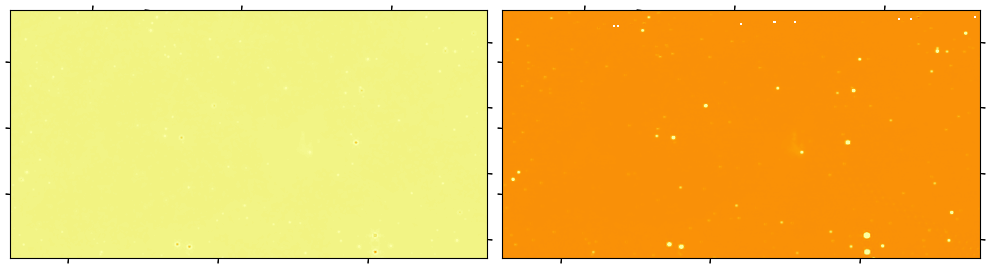

In [102]:
fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(121, projection=cutout_cont.wcs)
ax2 = fig.add_subplot(122, projection=cutout_line.wcs)

ax1.imshow(cutout_cont.data, origin='lower', cmap='inferno', norm=simple_norm(cutout_cont.data, stretch='log', max_percent=99.9))
ax2.imshow(cutout_line.data, origin='lower', cmap='inferno', norm=simple_norm(cutout_line.data, stretch='log', max_percent=99.9))

plt.tight_layout()

In [103]:
rgb = np.zeros((cutout_cont.data.shape[0], cutout_cont.data.shape[1], 3))
rgb[:,:,0] = cutout_cont.data
rgb[:,:,1] = cutout_line.data + cutout_cont.data
rgb[:,:,2] = cutout_line.data

rgb_scaled = np.array([
    simple_norm(rgb[:,:,0], stretch='asinh', vmin=0, vmax=100)(rgb[:,:,0]),
    simple_norm(rgb[:,:,1], stretch='asinh', vmin=0, vmax=200)(rgb[:,:,1]),
    simple_norm(rgb[:,:,2], stretch='asinh', vmin=0, vmax=90)(rgb[:,:,2])
]).swapaxes(0,2).swapaxes(1,0)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/orange/adamginsburg/miniconda3/envs/python312/lib/python3.12/site-packages/matplotlib/cm.py:494: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)
/orange/adamginsburg/miniconda3/envs/python312/lib/python3.12/site-packages/matplotlib/cm.py:494: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)
/orange/adamginsburg/miniconda3/envs/python312/lib/python3.12/site-packages/matplotlib/cm.py:494: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


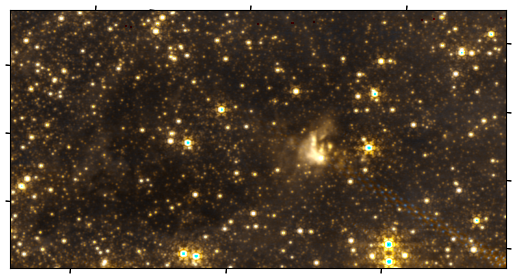

In [104]:
ax = plt.subplot(projection=cutout_cont.wcs)
ax.imshow(rgb_scaled, origin='lower')

In [109]:
cutout_405 = cm.get_cutout_405(pos, w, l)
cutout_410 = cm.get_cutout_410(pos, w, l)

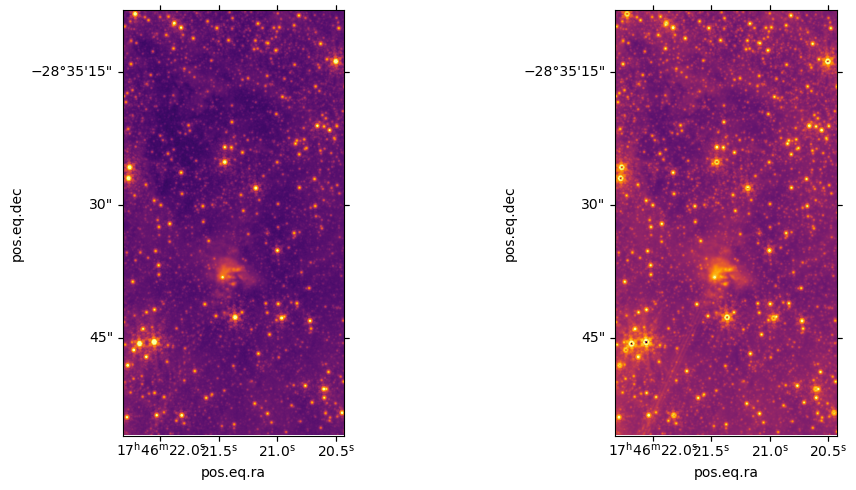

In [110]:
fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(121, projection=cutout_405.wcs)
ax2 = fig.add_subplot(122, projection=cutout_410.wcs)

ax1.imshow(cutout_405.data, origin='lower', cmap='inferno', norm=simple_norm(cutout_405.data, stretch='log', max_percent=99.9))
ax2.imshow(cutout_410.data, origin='lower', cmap='inferno', norm=simple_norm(cutout_410.data, stretch='log', max_percent=99.9))

plt.tight_layout()
plt.show()

In [111]:
rgb = np.zeros((cutout_405.data.shape[0], cutout_405.data.shape[1], 3))
rgb[:,:,0] = cutout_405.data
rgb[:,:,1] = cutout_410.data + cutout_405.data
rgb[:,:,2] = cutout_410.data

rgb_scaled = np.array([
    simple_norm(rgb[:,:,0], stretch='linear', vmin=0, vmax=20)(rgb[:,:,0]),
    simple_norm(rgb[:,:,1], stretch='linear', vmin=0, vmax=40)(rgb[:,:,1]),
    simple_norm(rgb[:,:,2], stretch='linear', vmin=0, vmax=20)(rgb[:,:,2])
]).swapaxes(0,2).swapaxes(1,0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


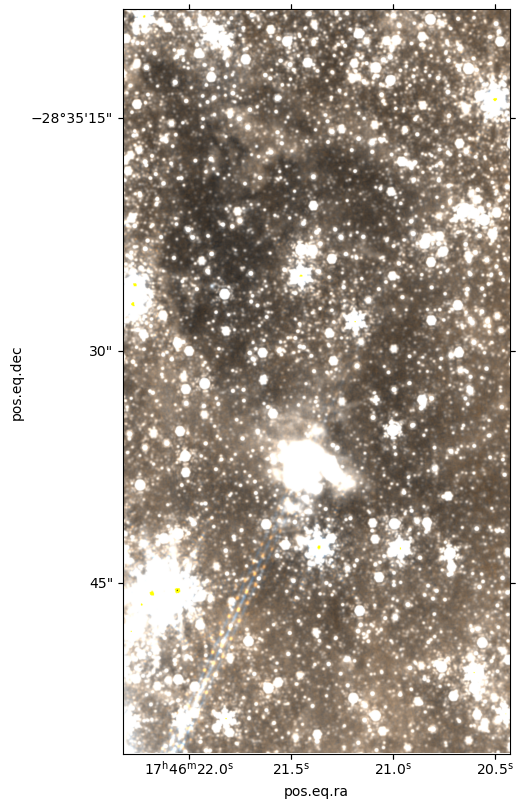

In [115]:
fig = plt.figure(figsize=(5, 10))
ax = plt.subplot(projection=cutout_405.wcs)
ax.imshow(rgb_scaled, origin='lower')